In [18]:
# NumPy
import numpy as np # linear algebra

# Dataframe operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Scalers
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.ensemble import RandomForestClassifier

# Model Helper Functions
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Attribute Definitions ##

Matrix column entries (attributes):

+ name - ASCII subject name and recording number
+ MDVP:Fo(Hz) - Average vocal fundamental frequency
+ MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
+ MDVP:Flo(Hz) - Minimum vocal fundamental frequency
+ MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
+ MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
+ NHR,HNR - Two measures of ratio of noise to tonal components in the voice status
+ Health status of the subject (one) - Parkinson's, (zero) - healthy
+ RPDE,D2 - Two nonlinear dynamical complexity measures
+ DFA - Signal fractal scaling exponent
+ spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Load Dataset

In [19]:
data = pd.read_csv('Parkinsson disease.csv')
data.head()
# print(data.describe(include='all'))

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Check datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Plot up features

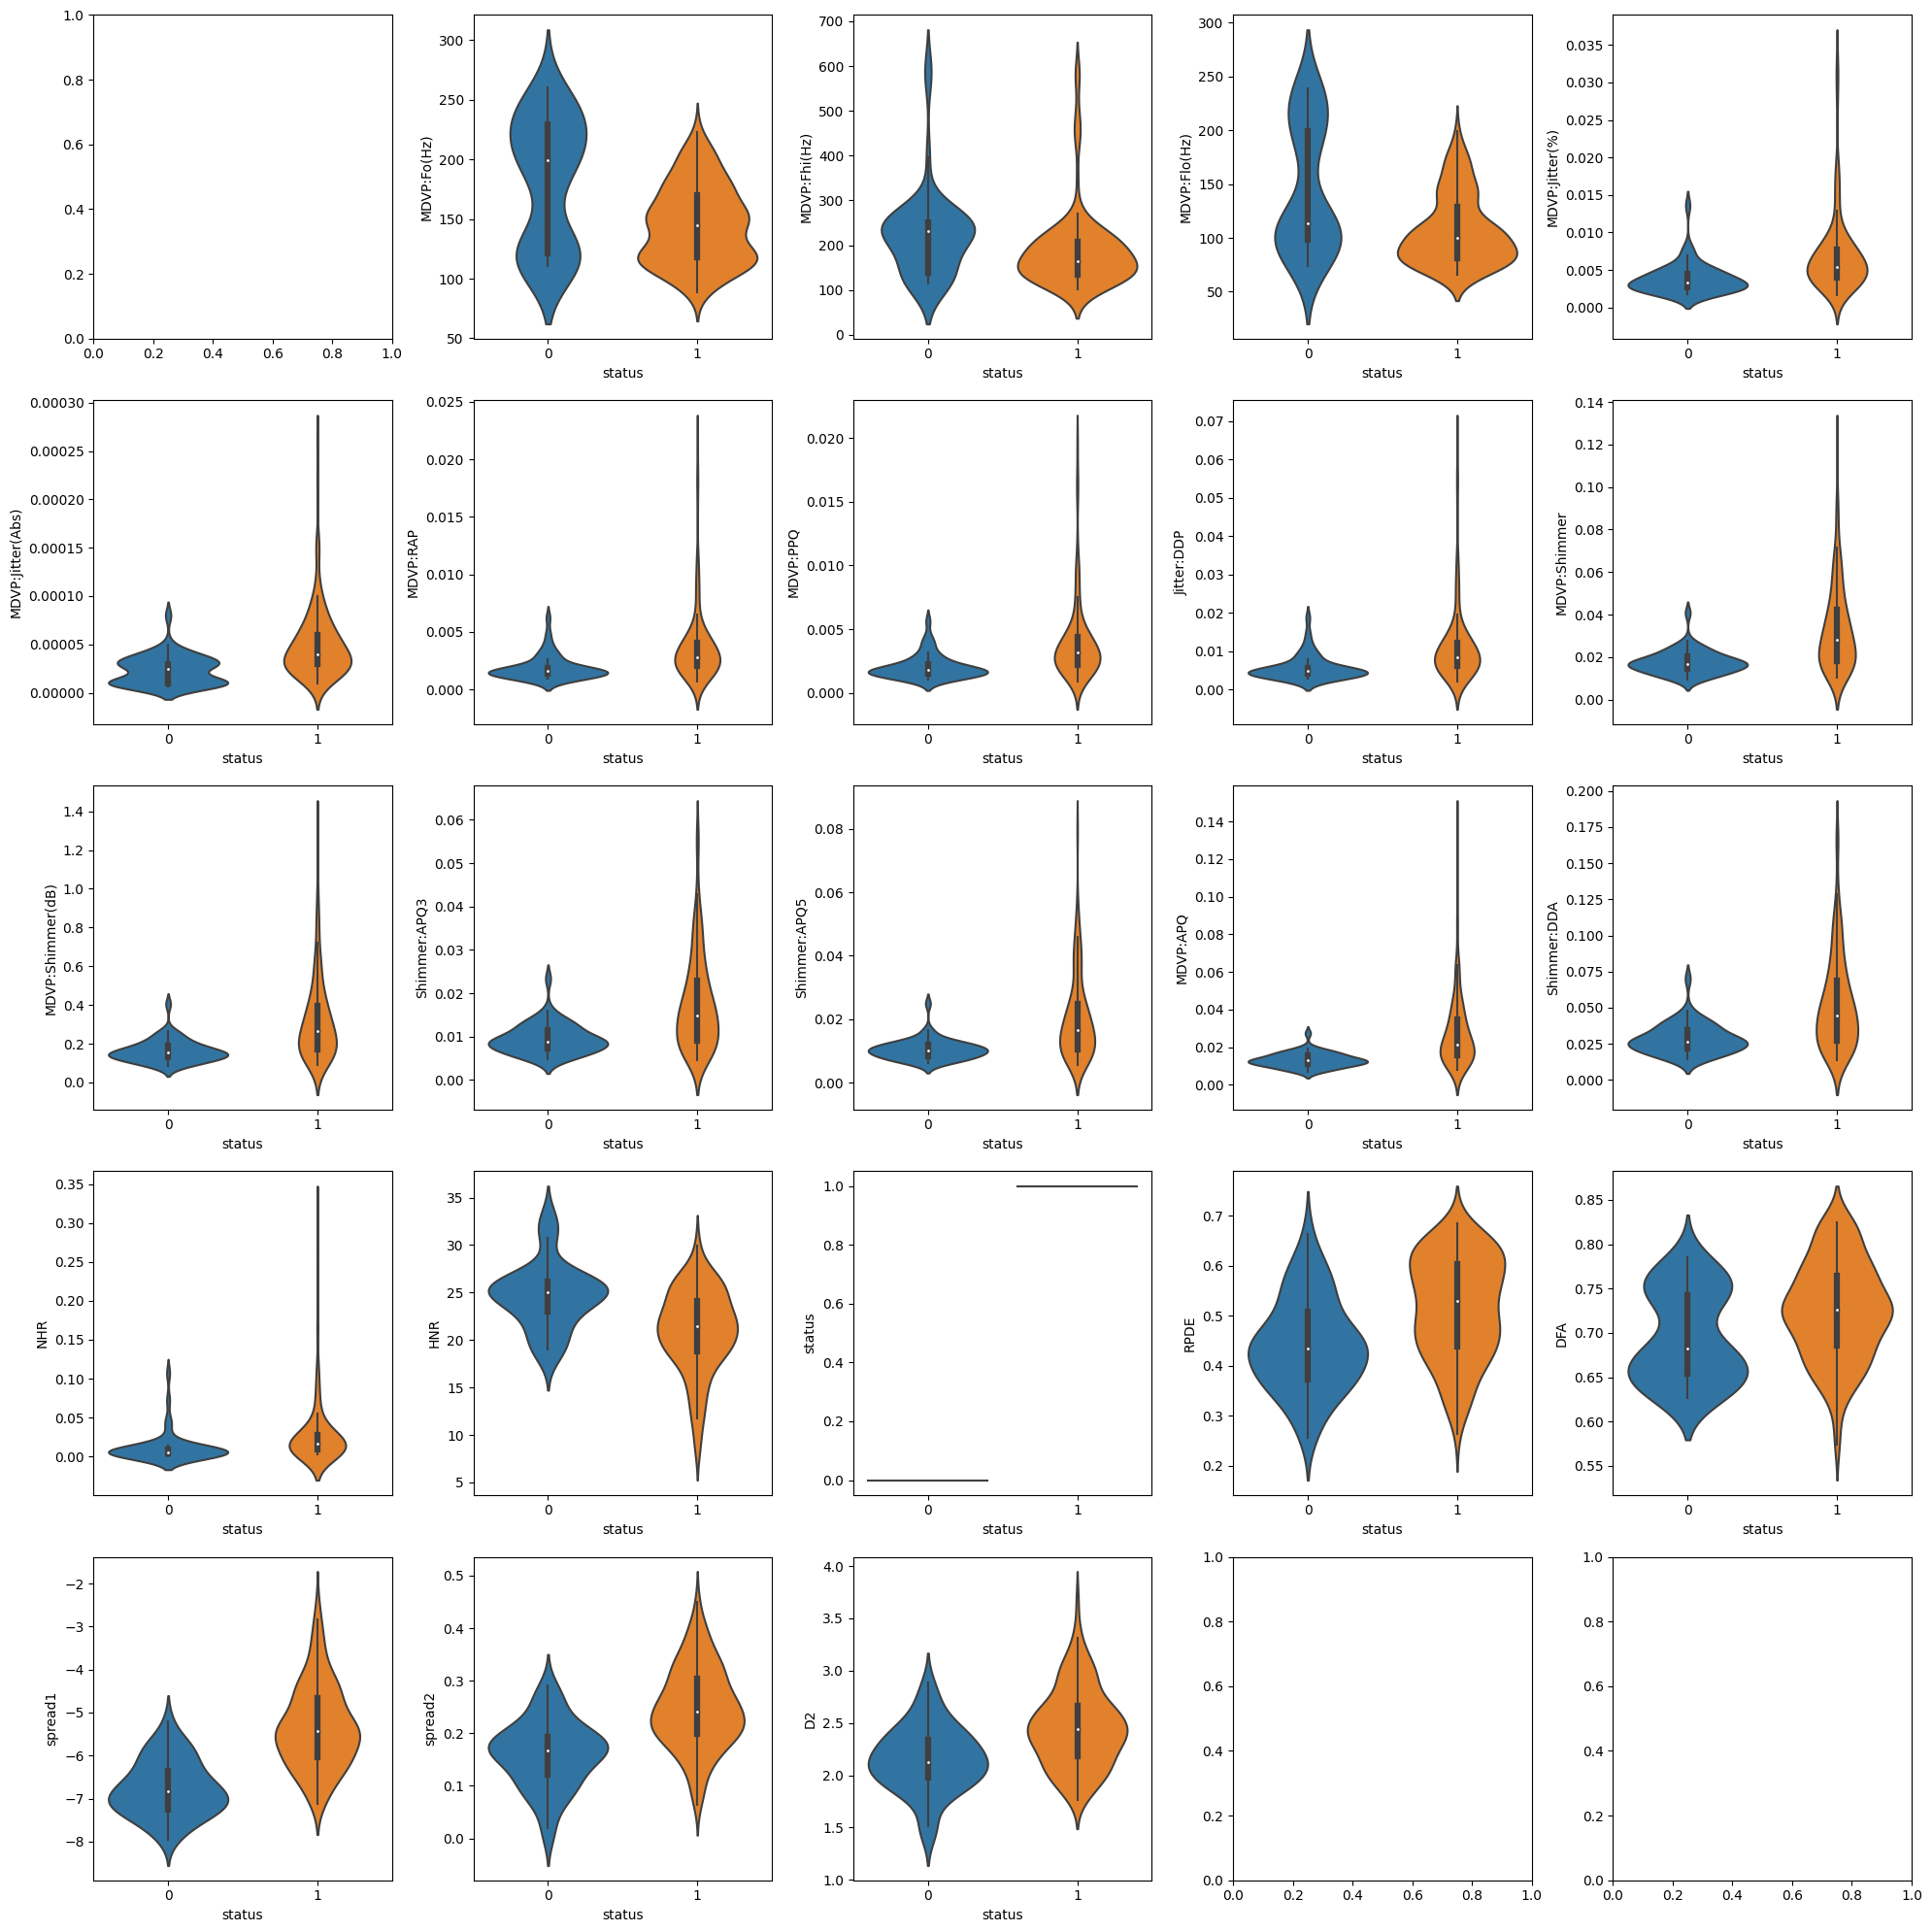

In [6]:
fig,axes = plt.subplots(5,5,figsize=(20,20))
axes=axes.flatten()

for i in range(1, len(data.columns)-1):
    sns.violinplot(x='status', y=data.iloc[:,i], data=data, orient='v', ax=axes[i])
plt.tight_layout()
plt.show()
plt.close()

# Define features and target arrays

In [7]:
X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23]]
# X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y = data.iloc[:,17]

percent_has_parkinsons = round(sum(data.status)/len(data)*100, 2)
print(f"{percent_has_parkinsons} percept of examples in dataset have Parkinsons.")

data.status.value_counts()


75.38 percept of examples in dataset have Parkinsons.


1    147
0     48
Name: status, dtype: int64

# Split dataset into training and validation arrays

In [8]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale Features

In [9]:
# Scale Data

# Fit on training set only:
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Models

## 1. Logistic Regression

In [10]:
model_cm_dict = dict()

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

# Predict y for validation set
y_pred_lr = model_lr.predict(X_val)

# Evaluate Model Accuracy
cm_lr = metrics.confusion_matrix(y_val, y_pred_lr)
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
accuracy = round(metrics.accuracy_score(y_val, y_pred_lr), 2)
print(f'Model accuracy: {accuracy*100}')
print(f'Confusion Matrix: \n{cm_lr}')

Model accuracy: 85.0
Confusion Matrix: 
[[10  7]
 [ 3 45]]


## 2. K Nearest Neighbors

In [11]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Predict y for validation set
y_pred_knn = model_knn.predict(X_val)

# Evaluate Model Accuracy
cm_knn = metrics.confusion_matrix(y_val, y_pred_knn)
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
accuracy = round(metrics.accuracy_score(y_val, y_pred_knn), 2)
print(f'Model accuracy: {accuracy*100}')
print(f'Confusion Matrix: \n{cm_knn}')

Model accuracy: 92.0
Confusion Matrix: 
[[13  4]
 [ 1 47]]


## 3. Neural Network

In [12]:
# Build neural network

model_nn = Sequential([
    Dense(units=25, kernel_regularizer=l2(0.001), activation='relu'),
    Dense(units=15, kernel_regularizer=l2(0.001), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
# Train neural network

model_nn.compile(optimizer='adam', loss=BinaryCrossentropy())
model_nn.fit(X_train,y_train, epochs=100)

In [14]:
# Make predictions using model
    
y_pred_nn = model_nn.predict(X_val)
for i in range(len(y_pred_nn)):
    if y_pred_nn[i] >= 0.5:
        y_pred_nn[i] = 1
    else:
        y_pred_nn[i] = 0

3/3 [==============================] - 0s 2ms/step


In [15]:
# Evaluate Model Accuracy
cm_nn = metrics.confusion_matrix(y_val, y_pred_nn)
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()
accuracy = round(metrics.accuracy_score(y_val, y_pred_nn), 2)
print(f'Model accuracy: {accuracy*100}')
print(f'Confusion Matrix: \n{cm_nn}')

Model accuracy: 83.0
Confusion Matrix: 
[[10  7]
 [ 4 44]]


## 4. Random Forest

In [16]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)
for i in range(len(y_pred_rf)):
    if y_pred_rf[i] >= 0.5:
        y_pred_rf[i] = 1
    else:
        y_pred_rf[i] = 0


# Evaluate Model Accuracy
cm_rf = metrics.confusion_matrix(y_val, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
accuracy = round(metrics.accuracy_score(y_val, y_pred_rf), 2)
print(f'Model accuracy: {accuracy*100}')
print(f'Confusion Matrix: \n{cm_rf}')

# mae = mean_absolute_error(y_val, y_pred_rf)
# print(f"mean absolute error: {mae}")

Model accuracy: 94.0
Confusion Matrix: 
[[13  4]
 [ 0 48]]


# Compare Model Results

[Text(2549.909420289855, 0.5, 'True Label'),
 Text(0.5, 36.72222222222221, 'Predicted Label')]

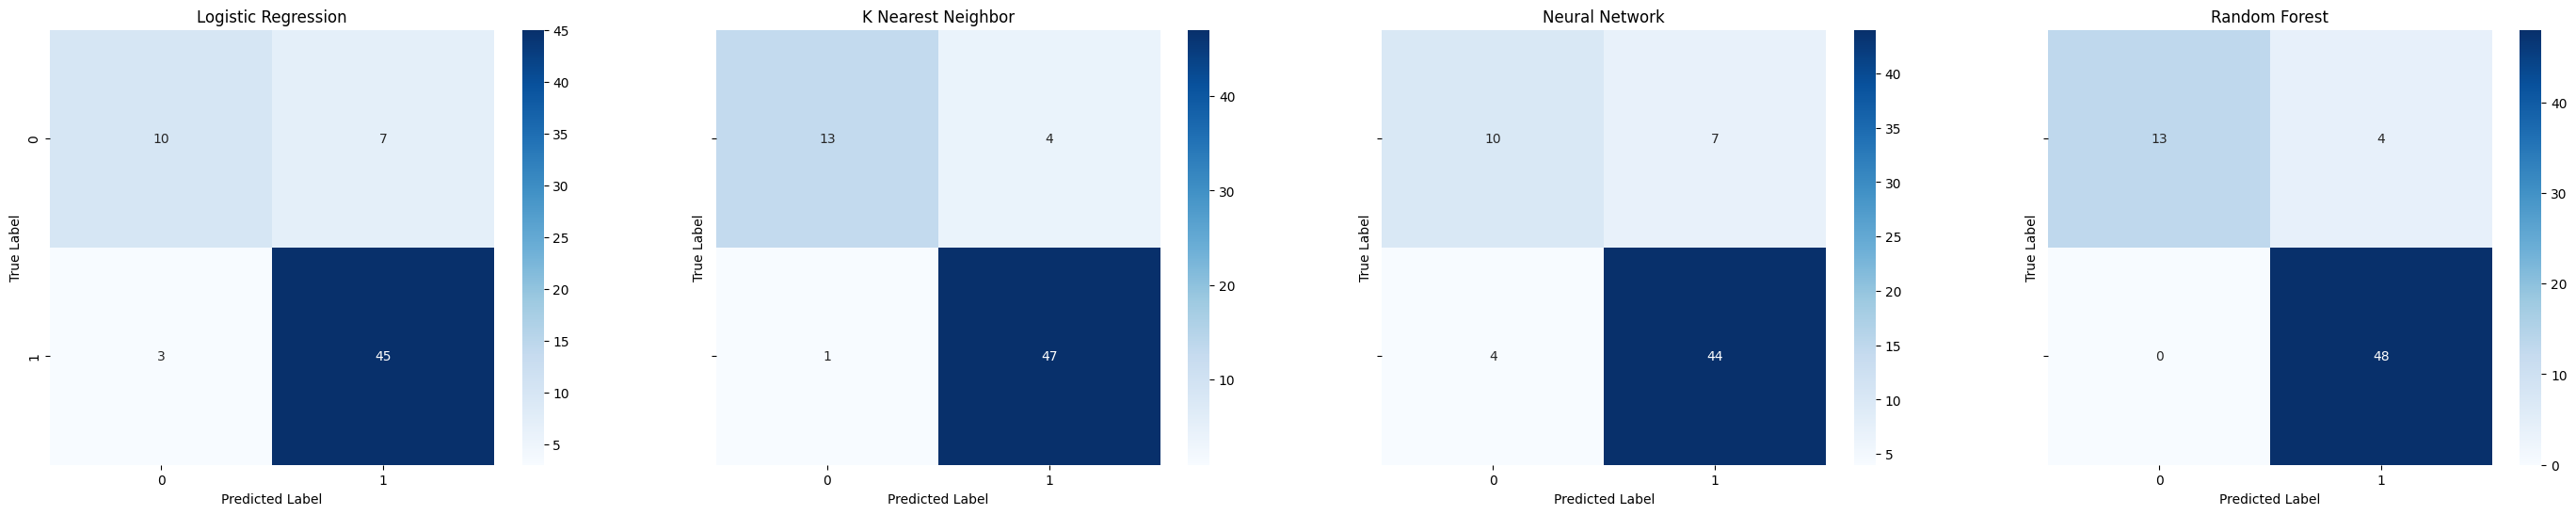

In [17]:
# Plot Confusion Matrix

fig,axes = plt.subplots(1,4,figsize=(35,6), sharey=True)
# axes=axes.flatten()
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Logistic Regression
sns.heatmap(cm_lr, ax=axes[0], annot=True, cmap='Blues', )
axes[0].set_title('Logistic Regression')
axes[0].set(ylabel='True Label', xlabel="Predicted Label")

# KNN
sns.heatmap(cm_knn, ax=axes[1], annot=True, cmap='Blues')
axes[1].set_title('K Nearest Neighbor')
axes[1].set(ylabel='True Label', xlabel="Predicted Label")

# Neural Network
sns.heatmap(cm_nn, ax=axes[2], annot=True, cmap='Blues')
axes[2].set_title('Neural Network')
axes[2].set(ylabel='True Label', xlabel="Predicted Label")

# Random Forest
sns.heatmap(cm_rf, ax=axes[3], annot=True, cmap='Blues')
axes[3].set_title('Random Forest')
axes[3].set(ylabel='True Label', xlabel="Predicted Label")